# Preparing Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_lfw_people
def createIRIS():
    data=datasets.load_iris()
    U=pd.DataFrame(data["data"],columns=data["feature_names"])
    labels=pd.Series(data["target_names"])
    U["target"]=data["target"]
    U["label"]= [labels[i] for i in data["target"]]
    return U
U=createIRIS()
U

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [452]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(U[U.columns[:-2]])
Y=U[U.columns[-2]]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.2)

# I Deriving Neural Network
$\DeclareMathOperator {\Diag}{Diag}$
## 1.Notations & Definitions
### 1.1. Experience
- We will denote by $\mathbb{1}_i \in \mathbb{R}^i $ the vector of ones $\forall i \in \mathbb{N}$ 
- $\mathscr{A}\left(E,F\right)$ is the set of affine transformations between $E$ and $F$
- Let $m=d_1$ the number of features.
- Let $n \in \mathbb{N}^*$ the number of samples
- Let $X \in E^n$ be a tuple of input samples 
- Let $k=d_L$ the number of classes of the output
- Let $y \in \{0,k-1\}^n$ be a tuple of samples 
- Let $Y_i=(\delta_{s,y_i})_{s\in\{1,\dots,k\}}\forall i \in \{1,\dots,n\}$ the representation of each ouput on the neural network

### 1.2. Neural network
- Let $L\in \mathbb{N}_{\ge 2}$ be the number of all layers
- Let $d_1,\dots,d_{L}$ be the dimension of the respective layer
- Let $E_i=\mathbb{R}^{d_i}$
- Let $\mathscr{A}_i=\mathscr{A}\left(E_{i-1},E_i\right),i\in\left\{2,\dots,L\right\}$
- Let $\sigma_i \in \mathscr{C}^1\left(E_i,E_i\right) \forall i \in \{2,\dots,L\}$ be a series of activation functions with $\sigma_L$ a cumulative distribution function so that the final output can be interpreted as a probability
- Let $\mathscr{K}=\prod_{i=2}^L\mathscr{A}_i$ the vector space in which the parameters vary
- Let $\Psi\in \mathscr{C}^1\left(\mathscr{K}\times E_1,E_L\right)/$
$$\forall \boldsymbol{T}=(T_2,\dots,T_L),\in\mathscr{K},\forall u \in E_1,\quad\Psi(\boldsymbol{T},u)=\left(\bigcirc_{i=0}^{L-2}\sigma_{L-i}\circ T_{L-i}\right)(u)$$
- Let $C \in \mathbb{R}_+$ be a hyperparameter
- Let $\mathscr{N}=\lVert\cdot\rVert$ be a norm on $\mathscr{K}$
- Let $\mathscr{l}\in \mathscr{F}\left([0,1]^{k}\times [0,1]^{k},\mathbb{R}\right)$ the unit cost function
- Let $\mathscr{L} \in \mathscr{F}\left(\mathscr{K},\mathbb{R}\right)$ the cost function for this experience:
$$\forall \boldsymbol{T} \in \mathscr{K},\quad \mathscr{L}(\boldsymbol{T})=C\sum_{i=1}^{n}\mathscr{l}\left(\Psi(\boldsymbol{T},X_i),Y_i\right)+\lVert \boldsymbol{T}\rVert$$
- For each vector $X_i,i \in \{1,\dots,n\}$, We will denote by $\left(^{(i)}a^{(j)}\right)_{j\in\{1,\dots,L\}}$ and $\left(^{(i)}z^{(j)}\right)_{j\in\{1,\dots,L\}}$ the following sequences:
$$\begin{cases}^{(i)}a^{(1)}= ^{(i)}z^{(1)}=X_i \\ 
^{(i)}a^{(j)} = \sigma_i\left(^{(i)}z^{(j)}\right) \\
^{(i)}z^{(j)} = T_i\left(^{(i)}a^{(j-1)}\right)
\end{cases}$$
- We will use as a notation $\dfrac{\partial f}{\partial u}\left(u_0\right)=J_f\left(u_0\right)$
- We will denote a neural network any tuple $\mathcal{N}=\left(\boldsymbol{E},\boldsymbol{T},\boldsymbol{\sigma}\right)$, where: $$\begin{cases} 
\boldsymbol{E}=\left(E_1,\dots,E_L\right) \\
\boldsymbol{\sigma}=\left(\sigma_2,\dots,\sigma_L\right)
\end{cases}
$$
### 1.3. Diagram
A neural network $\mathcal{N}$ with $\begin{cases}
\boldsymbol{E}=\left(\mathbb{R}^{12},\mathbb{R}^6,\mathbb{R}^6,\mathbb{R}^2\right) \\
\boldsymbol{T}=\left(T_2,T_3,T_4\right)\\
\boldsymbol{\sigma}=\left(\sigma_2,\sigma_3,\sigma_4\right)
\end{cases}
$
<p style="text-align: center;">
<img src="nn.png" style="text-align: center;">
</p>

## 2. Objective
We will try to find: $$\boldsymbol{T}_*=\arg\min_{\boldsymbol{T}\in \mathscr{K}} \mathscr{L}(\boldsymbol{T})$$
## 3. Strategy
The problem maybe too hard to crack globally, So assuming that $\sigma$ is a $\mathscr{C}^1$ function, we will fix a $\boldsymbol{T}_0\in \mathscr{K}$ and try to find a local minimum close to $\boldsymbol{T}_0$
## 4. Backtracking
Let $i\in\{1,\cdots,n\},j\in \{2,\cdots,L\}$
We have the following identities:
1. $$ \dfrac{\partial a^{(j)}}{\partial z^{(j)}} =  \dfrac{\partial \sigma_j(z^{(j)})}{\partial z^{(j)}} = \dfrac{\partial \sigma_j}{\partial z^{(j)}}$$
2. $$ \dfrac{\partial z^{(j)}}{\partial a^{(j-1)}}= \dfrac{\partial \left(T_j(a^{(j-1)})\right)}{\partial a^{(j-1)}}=\dfrac{\partial \left(f_j(a^{(j-1)})+b_j\right)}{\partial a^{(j-1)}}=\dfrac{\partial f_j}{\partial a^{(j-1)}}=f_j \quad \text{where }
\begin{cases} f_j=T_j-b_j \in \mathscr{L}\left(E_{j-1},E_j\right) \\ b_j=T_j(0)
\end{cases}$$ 
3. $$ \dfrac{\partial z^{(j)}}{\partial f_j}= \dfrac{\partial \left(f_j(z^{(j-1)})+b_j\right)}{\partial f_j}=\dfrac{\partial \left(f_j(a^{(j-1)})\right)}{\partial f_j} = \begin{pmatrix}
(a^{(j-1)})^T & \cdots & \cdots & \boldsymbol{0}_{E_{j-1}}^T\\
\boldsymbol{0}_{E_{j-1}}^T &  (a^{(j-1)})^T & \cdots & \boldsymbol{0}_{E_{j-1}}^T\\
\vdots & \vdots & \ddots  & \boldsymbol{0}_{E_{j-1}}^T\\
\boldsymbol{0}_{E_{j-1}}^T & \cdots & \cdots & (a^{(j-1)})^T
\end{pmatrix} $$
4. $$ \dfrac{\partial z^{(j)}}{\partial b_j}= \dfrac{\partial \left(f_j(a^{(j-1)})+b_j\right)}{\partial b_j}= I_{d_j} $$
5. $$\dfrac{\partial z^{(j)}}{\partial T_j} = 
\begin{pmatrix}
\dfrac{\partial z^{(j)}}{\partial f_j} & \dfrac{\partial z^{(j)}}{\partial b_j}
\end{pmatrix}=
 \begin{pmatrix}
(a^{(j-1)})^T & \cdots & \cdots & \boldsymbol{0}_{E_{j-1}}^T & 1 & 0 & \cdots & 0\\
\boldsymbol{0}_{E_{j-1}}^T &  (a^{(j-1)})^T & \cdots & \boldsymbol{0}_{E_{j-1}}^T & 0 &1 & \cdots & 0\\
\vdots & \vdots & \ddots  & \boldsymbol{0}_{E_{j-1}}^T & \vdots & \vdots & \ddots & \vdots & \\
\boldsymbol{0}_{E_{j-1}}^T & \cdots & \cdots & (a^{(j-1)})^T & 0 & \cdots & \cdots & 1
\end{pmatrix}$$

## 5. Exemples of Activation Functions & Cost Function

### 5.1.  Cost function:
A widely used unit cost function is the cross-entropy loss function
$$ \mathscr{l}(u,v)= \lVert-v\odot \ln(u)- (\mathbb{1}-v)\odot \ln(\mathbb{1}-u)\rVert_1 = \sum_{i=1}^{k}-v_i\ln(u_i)- (1-v_i)\ln(1-u_i)$$
The cost function is then:
$$ \mathscr{L}(\boldsymbol{T})=C\sum_{i=1}^{n}\mathscr{l}\left(\Psi(\boldsymbol{T},X_i),Y_i\right)+\lVert \boldsymbol{T}\rVert = C\sum_{i=1}^{n}\sum_{j=1}^{k}-Y_{i,j}\ln(\Psi(\boldsymbol{T},X_i))_j- (1-Y_{i,j})\ln(1-\Psi(\boldsymbol{T},X_i))_j+\lVert \boldsymbol{T}\rVert   $$
### 5.2 Activation functions & their jacobians:
Here raising a vector to an exponent is done element wise.
1. Hyperbolic tangent $\sigma_j=\tanh$ applied element-wise:
$$ \dfrac{\partial a^{(j)}}{\partial z^{(j)}} = \dfrac{\partial \sigma_j}{\partial z^{(j)}}= \Diag\left(\sigma_j'(z^{(j)})\right)=\Diag\left(\mathbb{1}-\left(\sigma(z^{(j)})\odot\sigma(z^{(j)})\right)\right)=\Diag\left(\mathbb{1}-\left(\sigma(z^{(j)})^2\right)\right)=\Diag\left(\mathbb{1}-\left((a^{(j)})^2\right)\right)$$
2. Logistic function $\sigma_j=\sigma$ applied element-wise: 
$$ \dfrac{\partial a^{(j)}}{\partial z^{(j)}} = \dfrac{\partial \sigma_j}{\partial z^{(j)}}= \Diag\left(\sigma_j'(z^{(j)})\right)=\Diag\left(\sigma(z^{(j)})\odot\left(\mathbb{1}-\sigma(z^{(j)})\right) \right)=\Diag\left(a^{(j)}\odot\left(\mathbb{1}-a^{(j)}\right) \right)$$£

3. Guassian function $\sigma_j=g=e^{-x^2}$:
$$ \dfrac{\partial a^{(j)}}{\partial z^{(j)}} = \dfrac{\partial \sigma_j}{\partial z^{(j)}}= \Diag\left(g'(z^{(j)})\right)=-2\Diag\left(z^{(j)}\odot g\left(z^{(j)}\right)\right)=-2\Diag\left(z^{(j)} \odot a^{(j)} \right)$$

### 5.3 Cumulative Distribution functions:
Note that every CDF can be used as an activation function
1. Logistic function $\sigma$

# II. Implementing Neural Network
For simplicity, the implemenatation will use only one activation function: $\sigma$
## 1. Creating Neural Network Class
### a. Creating Activation Functions

In [289]:
from scipy.optimize import minimize
from scipy.special import xlogy
def sigmoid(x):
    return 1/(1+np.exp(-x))

class ActivationFunction:
    def __init__(self,f,df):
        self.f=f
        self.df=df
    pass

class PointWiseActivationFunction(ActivationFunction):
    def __init__(self,f,derivative):
        self.derivative=derivative
        ActivationFunction.__init__(self,f,lambda x:np.diag(derivative(x)))
    pass

class GaussianActivation(PointWiseActivationFunction):
    def __init__(self,alpha=1):
        PointWiseActivationFunction.__init__(self,lambda x:np.exp(-alpha*x**2),lambda x:-2*alpha*x*np.exp(-alpha*x**2))
    pass
        
class SoftmaxActivation(ActivationFunction):
    def _f(self,x):
        s=np.exp(x)
        return s/s.sum()
    def _df(self,x):
        return -np.outer(self._f(x),self._f(x)) + np.diag(self._f(x))
    def __init__(self):
        ActivationFunction.__init__(self,self._f,self._df)
    pass

class MaxActivation(ActivationFunction):
    def _f(self,x):
        return np.max(x)*np.ones(x.shape[0])
    def _df(self,x):
        i=np.argmax(x)
        J=np.zeros([x.shape[0],x.shape[0]])
        J[:,i]=1
        return J
    def __init__(self):
        ActivationFunction.__init__(self,self._f,self._df)
    pass

class LogisticActivation(PointWiseActivationFunction):
    def __init__(self):
        PointWiseActivationFunction.__init__(self,sigmoid,lambda x:sigmoid(x)*(1-sigmoid(x)))
        
    pass

class IdentityActivation(PointWiseActivationFunction):
    def __init__(self):
        PointWiseActivationFunction.__init__(self,lambda x:x,lambda x:1)
    pass

class TanhActivation(PointWiseActivationFunction):
    def __init__(self):
        PointWiseActivationFunction.__init__(self,lambda x:np.tanh(x),lambda x:1-np.tanh(x)**2)
    pass

class ReLUActivation(PointWiseActivationFunction):
    def __init__(self):
        PointWiseActivationFunction.__init__(self,lambda x:np.maximum(x,0),lambda x:(x>0)*1)
    pass

class SiLUActivation(PointWiseActivationFunction):
    def __init__(self):
        PointWiseActivationFunction.__init__(self,lambda x:x/(1+np.exp(-x)),lambda x:sigmoid(x)*(x*(1-sigmoid(x))+1))
    pass

class LeakyReLUActivation(ActivationFunction):
    def _df(self,x):
        delta=np.max([1,self.k])*np.ones(x.shape[0])
        delta[x<0]=np.min([1,self.k])
        return np.diag(delta)
    def __init__(self,k):
        self.k=k
        ActivationFunction.__init__(self,lambda x:np.maximum(x,k*x),self._df)
    pass

'''
logistic_function=ActivationFunction(sigmoid,lambda x:sigmoid(x)*(1-sigmoid(x)))
identity_function=ActivationFunction(lambda x:x,lambda x:1)
guassian_function=ActivationFunction(lambda x:np.exp(-x**2),lambda x:-2*x*np.exp(-x**2))
tanh_function=ActivationFunction(lambda x:np.tanh(x),lambda x:1-np.tanh(x)**2)
ReLU_function=ActivationFunction(lambda x:np.maximum(x,0),lambda x:(x>0)*1)
Softsign_function=ActivationFunction(lambda x:x/(1+np.abs(x)),lambda x:1/(1+np.abs(x))**2)
'''

class SoftsignActivation(PointWiseActivationFunction):
    def __init__(self):
        PointWiseActivationFunction.__init__(self,lambda x:x/(1+np.abs(x)),lambda x:1/(1+np.abs(x))**2)
    pass



### b. Creating Neural Network Designer

In [274]:


class NeuralNetworkDesigner:
    def __init__(self,x_dim,y_dim):
        x_dim=int(x_dim)
        y_dim=int(y_dim)
        self.design=[x_dim]
        self.activation_functions=[]
        self.y_dim=y_dim

#Adding hidden layer
    def add_layer(self,dim,act=LogisticActivation()):
        self.design.append(dim)
        self.activation_functions.append(act)
        return self
    
#Adding final layer 
    def close_network(self,act=LogisticActivation()):
        self.design.append(self.y_dim)
        self.activation_functions.append(act)
    
#Reshaping a vector according to the design
    def reshape(self,U):
        design=self.design
        M=[]
        k=0
        b=[]
        for i in range(len(design)-1):
            M.append(np.reshape(U[k:k+design[i]*design[i+1]],[design[i+1],design[i]]))
            k=k+design[i]*design[i+1]
            b.append(U[k:k+design[i+1]])
            k=k+design[i+1]            
        return M,b

#flattening according to the design    
    def flatten(self,M,b):
        design=self.design
        S=np.array(design)
        s=np.sum(S[:-1]*S[1:])
        r=np.sum(S[1:])
        U=np.zeros(s+r)
        k=0
        for i in range(len(design)-1):
            U[k:k+design[i]*design[i+1]]=np.ndarray.flatten(M[i])
            k=k+design[i]*design[i+1]
            U[k:k+design[i+1]]=b[i]
            k=k+design[i+1]
        return U
    
    def flattened_dimension(self):
        S=np.array(self.design)
        return np.sum(S[:-1]*S[1:])+np.sum(S[1:])
    def xdim(self):
        return self.design[0]
    def ydim(self):
        return self.y_dim
    pass        

### c. Neural Network

In [393]:
class NeuralNetwork:
    def __init__(self, designer,C=1):
        self.M=[]
        self.designer=designer
        self.design=self.designer.design
        self.b=[]
        self.C=C
        self.L=len(self.design)
        for i in range(self.L-1):
            self.M.append(np.random.normal(0,1,[self.design[i+1],self.design[i]]))
            self.b.append(np.random.normal(0,1,[self.design[i+1]]))
    
    def _predict_1(self,x):
        a = self.decision_function_1(x)
        return np.argmax(a,axis=0)
    
    def predict(self,X):
        return np.apply_along_axis(self._predict_1,arr=X.T,axis=0)
    
    def _unit_cost(self,u,w=None,retJac=False):
        y=u[-1]
        x=u[:-1]
        M,b=self.designer.reshape(w)
        a=[x]
        z=[x]
        act_functions=self.designer.activation_functions
        for i in range(0,self.L-1):
            z.append(M[i]@a[i]+b[i])
            a.append(act_functions[i].f(z[-1]))
        k=self.designer.ydim()
        v=np.zeros(k)
        v[int(y)]=1
        v_predicted=a[-1]
        l=-xlogy(v,v_predicted)-xlogy(1-v,1-v_predicted)
        if not retJac:
            return np.sum(l)
        chain = (-v/a[-1]+(1-v)/(1-a[-1]))
        chain[v==a[-1]]=0
        k=self.designer.flattened_dimension()
        jac=np.zeros([1,k])
        design=self.designer.design
        for i in range(self.L-1,0,-1):
#            chain=chain@np.diag(act_functions[i-1].df(z[i]))
            chain=chain@(act_functions[i-1].df(z[i]))
            k=k-design[i]
            jac[0,k:k+design[i]]=chain
            k=k-design[i]*design[i-1]        
            J=np.zeros([design[i],design[i]*design[i-1]])
            for j in range(0,design[i]):
                J[j,j*design[i-1] : (j+1)*design[i-1]]=a[i-1].T
            jac[0,k:k+design[i-1]*design[i]]=chain@J
            chain=chain@M[i-1]
        return np.sum(l),jac
    
    def cost(self,X,Y,w=None,retJac=False):
        if w is None:
            w=nn.flattened_parameters()
        S=self.designer.ydim()*X.shape[0]
        R=np.apply_along_axis(lambda u,w:self._unit_cost(u,w,retJac=retJac),arr=np.c_[X,Y],axis=1,w=w)
        L2=np.linalg.norm(w)
        if not retJac:
            return (self.C*np.sum(R)+L2)/S
        L=self.C*np.sum(R[:,0])+L2
        jac=np.ndarray.flatten(self.C*np.sum(R[:,1],axis=-1)+w.T/L2)
        return L/S,jac/S
    
    def fit(self,X,Y):
        self.M,self.b=self.designer.reshape(minimize(lambda w:self.cost(X,Y,w,retJac=True),
                                      x0= self.designer.flatten(self.M,self.b),jac=True).x)
        return self
    
    def decision_function_1(self,x):
        y=x
        for i in range(0,self.L-1):
            y=self.designer.activation_functions[i].f(self.M[i]@y+self.b[i])
        return y
    
    def decision_function(self,X):
        return np.apply_along_axis(self.decision_function_1,arr=X,axis=1)
    
    def parameters(self):
        return self.M,self.b
    
    def flattened_parameters(self):
        return self.designer.flatten(self.M,self.b)
    
    def score(self,X,Y):
        return (self.predict(X)==Y).mean()
    pass


class OptimizedNeuralNetwork:
    def __init__(self, designer,alpha=1):
        self.M=[]
        self.designer=designer
        self.design=self.designer.design
        self.b=[]
        self.alpha=alpha
        self.L=len(self.design)
        for i in range(self.L-1):
            self.M.append(np.random.normal(0,1,[self.design[i+1],self.design[i]]))
            self.b.append(np.random.normal(0,1,[self.design[i+1]]))
    
    def predict(self,X):
        return np.argmax(self.decision_function(X),axis=1)
    
    def cost(self,X,Y,w=None,retJac=False):
        S=self.designer.ydim()*X.shape[0]
        X=X.T
        V=np.zeros([designer.y_dim,Y.shape[0]])
        V[Y,np.arange(0,Y.shape[0])]=1
        if w is None:
            w=self.flattened_parameters()
        M,b=self.designer.reshape(w)
        A=[X]
        Z=[X]
        act_functions=self.designer.activation_functions
        for i in range(0,self.L-1):
            Z.append(M[i]@A[i]+b[i].reshape([-1,1]))
            A.append(act_functions[i].f(Z[-1]))
        k=self.designer.ydim()
        V_predicted=A[-1]
        L=-xlogy(V,V_predicted)-xlogy(1-V,1-V_predicted)
        loss=(L.sum(axis=None)+self.alpha*(w**2).sum(axis=None)/2)/S
        if not retJac:
            return loss
        dA = (-V/A[-1]+(1-V)/(1-A[-1]))
#        chain[v==a[-1]]=0
        k=self.designer.flattened_dimension()
        jac=np.zeros([1,k])
        design=self.designer.design
        for i in range(self.L-1,0,-1):
#            chain=chain@np.diag(act_functions[i-1].df(z[i]))
            dZ=dA*(act_functions[i-1].derivative(Z[i]))
            k=k-design[i]
            jac[0,k:k+design[i]]=dZ.sum(axis=1)/S
            k=k-design[i]*design[i-1]        
            jac[0,k:k+design[i-1]*design[i]]=np.ndarray.flatten(dZ@A[i-1].T)/S
            dA=M[i-1].T@dZ
        jac=jac+self.alpha*w/S
        return loss,np.squeeze(jac)
    
    def fit(self,X,Y):
        self.M,self.b=self.designer.reshape(minimize(lambda w:self.cost(X,Y,w,retJac=True),
                                      x0= self.designer.flatten(self.M,self.b),jac=True).x)
        return self
    
    def decision_function(self,X):
        Ŷ=X.T
        for i in range(0,self.L-1):
            Ŷ=self.designer.activation_functions[i].f(self.M[i]@Ŷ+self.b[i].reshape([-1,1]))
        return Ŷ.T
    
    def parameters(self):
        return self.M,self.b
    
    def flattened_parameters(self):
        return self.designer.flatten(self.M,self.b)
    
    def score(self,X,Y):
        return (self.predict(X)==Y).mean()
    pass
        

## 2. Creating Neural Network

In [447]:
designer = NeuralNetworkDesigner(X.shape[1],3)
designer.add_layer(6,LogisticActivation())
designer.close_network()
nn=OptimizedNeuralNetwork(designer,alpha=1)
T=nn.flattened_parameters()

## 3. Verifying Gradient

In [453]:
from scipy.optimize import check_grad
checker= check_grad(lambda T: nn.cost(X,Y,T),x0=designer.flatten(nn.M,nn.b),grad=lambda T: nn.cost(X,Y,T,retJac=True)[1])
print("Euclidean distance between given gradient and the approximated gradient using finite difference:\n{}".format(checker))

Euclidean distance between given gradient and the approximated gradient using finite difference:
1.142827928062403e-08


## 4. Training

In [454]:
oldCost,oldJac=nn.cost(X_train,Y_train,retJac=True)
print("Cost Before training: {}".format(oldCost))
print("Gradient Norm Before training: {}".format(np.linalg.norm(oldJac)))
nn.fit(X_train,Y_train)
T=nn.flattened_parameters()

newCost,newJac=nn.cost(X_train,Y_train,retJac=True)
print("Cost After training: {}".format(newCost))
print("Gradient Norm After training: {}".format(np.linalg.norm(newJac)))


Cost Before training: 0.27521860748167626
Gradient Norm Before training: 0.012390641403784304
Cost After training: 0.2717112539134797
Gradient Norm After training: 2.223171724960595e-05


## 5. Evaluating Model

In [455]:
print("Checking Accuarcy")
print("Training Accuarcy {}".format(nn.score(X_train,Y_train)))
print("Testing Accuarcy {}".format(nn.score(X_test,Y_test)))

Checking Accuarcy
Training Accuarcy 0.975
Testing Accuarcy 0.9666666666666667


Text(0.5, 1.0, 'Confusion Matrix of the model')

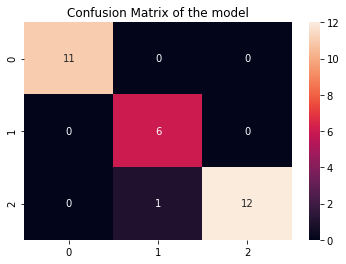

In [456]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,nn.predict(X_test)),annot=True)
plt.title("Confusion Matrix of the model")

## 6. Model Parameters

In [457]:
T

array([-0.08856796,  0.25351384, -1.1334583 , -1.6232888 ,  0.57112399,
       -0.99876956,  1.08534694,  0.93934611, -0.60736322,  1.00933747,
       -1.14444897, -0.97634615,  0.0093112 , -0.52157027,  1.59509716,
        2.20535155, -0.08908421,  0.25163926, -1.1299494 , -1.61851699,
       -0.60733816,  1.00930027, -1.14436184, -0.97626458,  1.57898643,
        1.10986338, -1.23913679, -2.38089249,  1.57184544, -1.23900342,
        0.25468388, -2.65171923,  1.78405409, -1.00357058,  0.25655981,
        1.78389535,  1.34656073,  1.48676205, -2.33179798, -3.05529645,
        1.33742268, -2.33145078, -2.16791179,  0.45514605, -0.49464948,
        2.68874571, -2.16247189, -0.49475259, -0.91335598, -0.73228849,
       -0.08354955])

In [169]:
y

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [170]:
Y=y

## Decision Boundary

(150, 150)


<ipython-input-458-0548c6a25296>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(R_mesh[:,:,0], R_mesh[:,:,1], np.tanh(.225*Y_mesh),alpha=.65)


Text(0.5, 1.0, 'Lineary separable data')

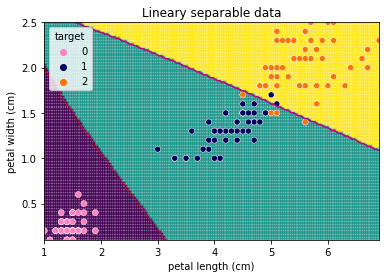

In [458]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
designer = NeuralNetworkDesigner(2,3)
designer.add_layer(6,SiLUActivation())
designer.close_network()
model=OptimizedNeuralNetwork(designer)
R=U.to_numpy()[:,2:4]
R=R.astype(np.float64)
model.fit(R,Y)
fig,ax=plt.subplots()
x=np.linspace(np.min(R[:,0]),np.max(R[:,0]),150)
y=np.linspace(np.min(R[:,1]),np.max(R[:,1]),150)
R_mesh=np.array(np.meshgrid(x,y)).transpose(1,2,0)
Y_mesh=model.predict(R_mesh.reshape((-1,2))).reshape((R_mesh.shape[0],R_mesh.shape[1]))
print(Y_mesh.shape)

c = ax.pcolormesh(R_mesh[:,:,0], R_mesh[:,:,1], np.tanh(.225*Y_mesh),alpha=.65)
c = ax.contour(R_mesh[:,:,0], R_mesh[:,:,1], Y_mesh, levels=[0,1,2],
               colors=["xkcd:red","xkcd:magenta","xkcd:blue"],linestyles=["dotted","solid","dotted"])
sns.scatterplot(x=U[U.columns[2]], y=U[U.columns[3]], hue=Y,ax=ax,palette=["xkcd:pink","xkcd:dark blue","xkcd:orange"]);
ax.set_title("Lineary separable data")

(150, 150)


<ipython-input-407-25c5ff34f10b>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(R_mesh[:,:,0], R_mesh[:,:,1], np.tanh(.225*Y_mesh),alpha=.65)
<ipython-input-407-25c5ff34f10b>:22: UserWarning: No contour levels were found within the data range.
  c = ax.contour(R_mesh[:,:,0], R_mesh[:,:,1], Y_mesh, levels=[0,1,2],


Text(0.5, 1.0, 'Lineary inseparable data')

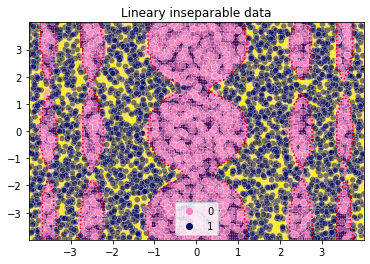

In [407]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
designer = NeuralNetworkDesigner(2,2)
designer.add_layer(6,TanhActivation())
designer.add_layer(6,TanhActivation())
designer.add_layer(6,TanhActivation())
designer.add_layer(6,TanhActivation())
designer.close_network()
model=OptimizedNeuralNetwork(designer,alpha=10)
R=np.random.uniform(-4,4,[5000,2])
R=R.astype(np.float64)
Z=(np.cos(R[:,0]**2)-np.sin(R[:,1])**2)
model.fit(R,(Z<0)*1)
fig,ax=plt.subplots()
x=np.linspace(np.min(R[:,0]),np.max(R[:,0]),150)
y=np.linspace(np.min(R[:,1]),np.max(R[:,1]),150)
R_mesh=np.array(np.meshgrid(x,y)).transpose(1,2,0)
Y_mesh=model.predict(R_mesh.reshape((-1,2))).reshape((R_mesh.shape[0],R_mesh.shape[1]))
print(Y_mesh.shape)

c = ax.pcolormesh(R_mesh[:,:,0], R_mesh[:,:,1], np.tanh(.225*Y_mesh),alpha=.65)
c = ax.contour(R_mesh[:,:,0], R_mesh[:,:,1], Y_mesh, levels=[0,1,2],
               colors=["xkcd:red","xkcd:magenta","xkcd:blue"],linestyles=["dotted","solid","dotted"])
sns.scatterplot(x=R[:,0], y=R[:,1], hue=(Z<0)*1,ax=ax,palette=["xkcd:pink","xkcd:dark blue"],alpha=.5);
ax.set_title("Lineary inseparable data")